<a href="https://colab.research.google.com/github/chris-gabaldon/Integrate-and-Fire-model--Neural-spiking/blob/main/Integrate_and_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, the Integrate and Fire model is developed, one of the earliest models to emulate the firing behavior of a neuron. This model is based on conceptualizing a neuron as an RLC electrical circuit, and its theoretical explanation can be found [here.](https://https://en.wikipedia.org/wiki/Biological_neuron_model)

##Library

In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

##Runge Kutta (4°) integrator

In [ ]:
# 1.2)
def rk4(x,f,t,h): #Runge kuta de orden 4
  k1=f(x,t)
  k2=f(x+h*k1/2,t+h/2)
  k3=f(x+h*k2/2,t+h/2)
  k4=f(x+h/k3,t+h)
  return x+(h/6)*(k1+2*k2+2*k3+k4)

# integrador sin mecanismo de disparo

def integrador_ode(esquema,X0, u, a,k, dt):
  d=X0.shape[0]
  ts = np.arange(a, k+1)*dt  # Tiempos donde calcularé la solución
  Xs = np.zeros(((k+1),d))    # Solución aproximada
  Xs[0] = X0                 # Impongo la condición inicial a t=0
  for j in range(k):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
    Xs[j+1] = esquema(Xs[j], u, ts[j], dt)
  return ts, Xs

# integrador con mecanismo de disparo activado superado un cierto umbral V_u

def integrate_and_fire(esquema,X0, u, a,k, dt,V_u):
  d=X0.shape[0]
  ts = np.arange(a, k+1)*dt  # Tiempos donde calcularé la solución
  Xs = np.zeros(((k+1),d))    # Solución aproximada
  Xs[0] = X0                 # Impongo la condición inicial a t=0
  picos=[]
  for j in range(k):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
    Xs[j+1] = esquema(Xs[j], u, ts[j], dt)
    if Xs[j+1]>V_u:
        Xs[j+1]=X0
        picos.append(ts[j])
  return ts, Xs, picos

##A)Without employing a shooting mechanism, with current zero current I. Phase diagram (finding the atractor)

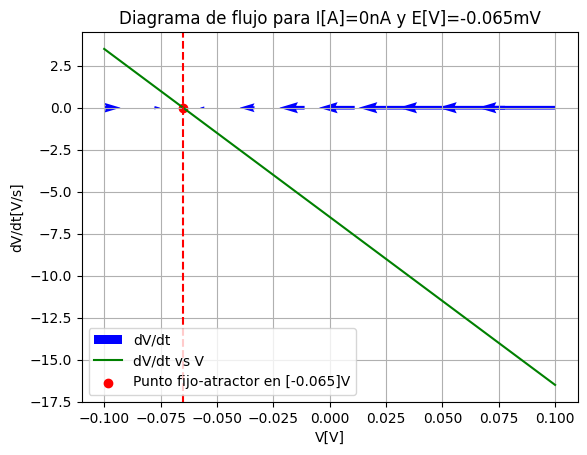

In [ ]:
#DEFINe the params
I=0
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([10e-3])

# dynamic + geometrci analysis

v=np.linspace(-0.1,0.1,10)
v_prima=(1/tau)*(E-v+R*I)
Y = np.zeros(10)
X = np.linspace(-0.1,0.1,10)

#   Create the vectorial field
U = v_prima
V = np.zeros(10)
plt.quiver(X, Y, U, V, color='b', units='xy', scale=6,label='dV/dt')
plt.plot(v,v_prima,label='dV/dt vs V',color='g')
plt.xlabel('V[V]')
plt.ylabel('dV/dt[V/s]')
plt.title(f'Diagrama de flujo para I[A]={I}nA y E[V]={E}mV')
# Show plot with grid
plt.grid()

# found the atractor

v_aux=np.linspace(-0.1,0.1,1000)
v_prima_aux=(1/tau)*(E-v_aux+R*I)
def elemento_mas_cercano(array, numero):
    diferencias = np.abs(array - numero)
    indice_elemento_mas_cercano = np.argmin(diferencias)
    valor_mas_cercano = array[indice_elemento_mas_cercano]
    indice=np.where(array==valor_mas_cercano)
    return indice
atractor=v_aux[elemento_mas_cercano(v_prima_aux,0)]
plt.axvline(atractor,linestyle='--',color='r')
plt.scatter(atractor,0,label=f'Punto fijo-atractor en {np.around(atractor,4)}V',color='r')
plt.legend(loc='lower left')

###B)Without shooting mechanismo, but now I=2nA.

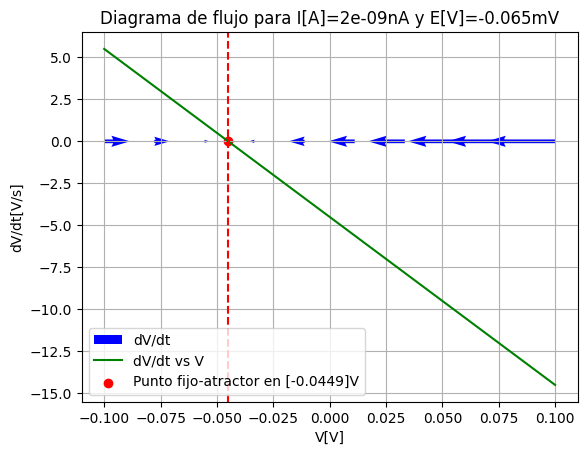

In [ ]:
#DEFINO LOS PARAMETROS
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([10e-3])

# DINAMICA DE LA SOLUCION + ANALISIS GEOMETRICO

v_B=np.linspace(-0.1,0.1,10)
v_prima_B=(1/tau)*(E-v_B+R*I)
Y = np.zeros(10)
X = np.linspace(-0.1,0.1,10)

#   Creo el campo vectorial
U_B= v_prima_B
V = np.zeros(10)
plt.quiver(X, Y, U_B, V, color='b', units='xy', scale=6,label='dV/dt')
plt.plot(v_B,v_prima_B,label='dV/dt vs V',color='g')
plt.xlabel('V[V]')
plt.ylabel('dV/dt[V/s]')
plt.title(f'Diagrama de flujo para I[A]={I}nA y E[V]={E}mV')
# Show plot with grid
plt.grid()

#hallar punto fijo (atractor)

v_aux_B=np.linspace(-0.1,0.1,1000)
v_prima_aux_B=(1/tau)*(E-v_aux+R*I)
atractor_B=v_aux_B[elemento_mas_cercano(v_prima_aux_B,0)]
plt.axvline(atractor_B,linestyle='--',color='r')
plt.scatter(atractor_B,0,label=f'Punto fijo-atractor en {np.around(atractor_B,4)}V',color='r')
plt.legend(loc='lower left')

###C) It can be demostrated that the analitical solution of the membrane potential $V$ , is:

$V(t)= e^{-t/\tau}(V_0-(E+R I(t=0)))+E+R I(t)$

When $\tau$ and $R$ are the electrical params of the model.

### D) Numerical solution of the potential V

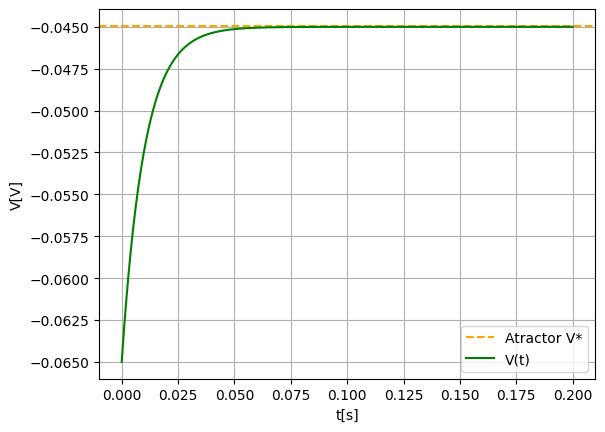

In [ ]:
#DEFINO PARAMETROS
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
V0=E

plt.axhline(atractor_B,linestyle='--',color='orange',label='Atractor V*') # el atractor calculado en el inciso B
t=np.linspace(0,0.2,1000)
V=np.exp(-t/tau)*(V0-E-R*I)+E+R*I
plt.plot(t,V,'g',label='V(t)')
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('V[V]')


plt.legend()

'\ntiene sentido q se vaya despegando las soluciones a medida que aumentan los pasos de integracion\nla analitica se pega al atractor mientras que la numerica a un atractr con un offset respecto de E\n'

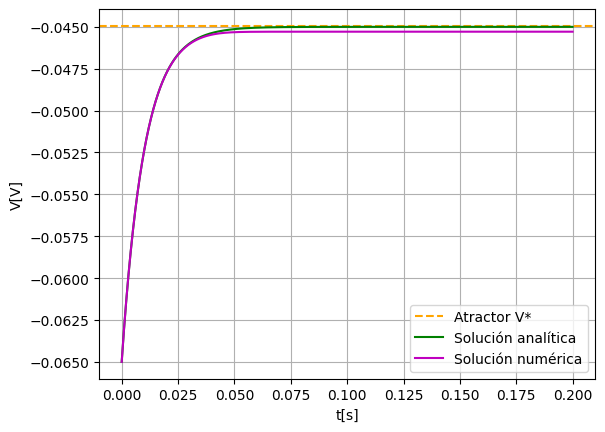

In [ ]:
#DEFINO LOS PARAMETROS
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k=4000        # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005       #PASO DE INTEGRACION

#INTEGRO NUMERICAMENTE
def func(v,t):
    return (1/tau)*(E-v+R*I)
t_num,V_num=integrador_ode(rk4,v0,func,a,k,dt)

#SOLUCION NUMERICA
t=np.linspace(0,0.2,400)
V=np.exp(-t/tau)*(V0-E-R*I)+E+R*I

#GRAFICOS

plt.axhline(atractor_B,linestyle='--',color='orange',label='Atractor V*') # el atractor calculado en el inciso B
plt.plot(t,V,label='Solución analítica',color='g')
plt.plot(t_num,V_num,label='Solución numérica',color='m')
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('V[V]')


plt.legend()
'''
tiene sentido q se vaya despegando las soluciones a medida que aumentan los pasos de integracion
la analitica se pega al atractor mientras que la numerica a un atractr con un offset respecto de E
'''

'\ntiene sentido q se vaya despegando las soluciones a medida que aumentan los pasos de integracion\nla analitica se pega al atractor mientras que la numerica a un atractr con un offset respecto de E\n'

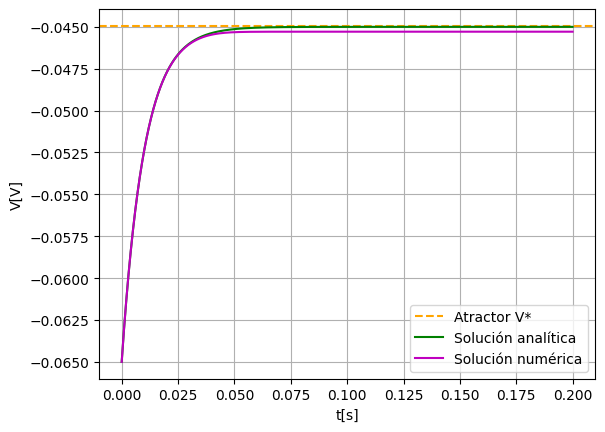

In [ ]:
#DEFINO LOS PARAMETROS
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k=4000        # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005       #PASO DE INTEGRACION

#INTEGRO NUMERICAMENTE
def func(v,t):
    return (1/tau)*(E-v+R*I)
t_num,V_num=integrador_ode(rk4,v0,func,a,k,dt)

#SOLUCION NUMERICA
t=np.linspace(0,0.2,400)
V=np.exp(-t/tau)*(V0-E-R*I)+E+R*I

#GRAFICOS

plt.axhline(atractor_B,linestyle='--',color='orange',label='Atractor V*') # el atractor calculado en el inciso B
plt.plot(t,V,label='Solución analítica',color='g')
plt.plot(t_num,V_num,label='Solución numérica',color='m')
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('V[V]')


plt.legend()
'''
tiene sentido q se vaya despegando las soluciones a medida que aumentan los pasos de integracion
la analitica se pega al atractor mientras que la numerica a un atractr con un offset respecto de E
'''

## Second part, with shooting mechanism activated.

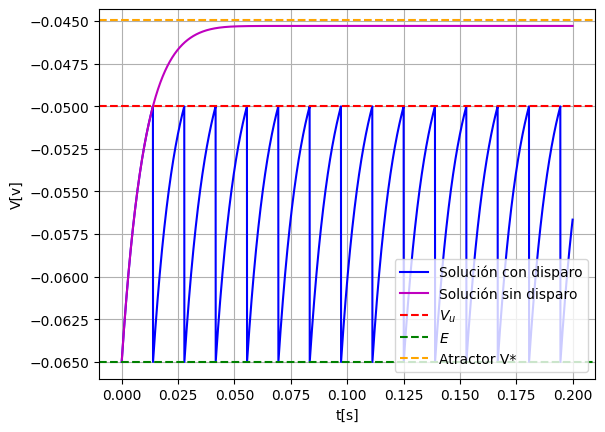

In [ ]:
#DEFINO LOS PARAMETROS
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k=4000        # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005
V_u=-50e-3       #TENSION DE UMBRAL

def func(v,t):            #EQ DIFERENCIAL
    return (1/tau)*(E-v+R*I)

#INTEGRO USANDO LA FUNCION CON DISPARO
t,V_disp,picos=integrate_and_fire(rk4,v0, func, a,k, dt,V_u)
plt.plot(t,V_disp,color='b',label='Solución con disparo')
plt.plot(t_num,V_num,color='m',label='Solución sin disparo')      # LA SOLUCION SIN DISPARO DEL INCISO E
plt.axhline(V_u,linestyle='--',color='r',label='$V_u$')
plt.axhline(E,linestyle='--',color='g',label='$E$')
plt.axhline(atractor_B,linestyle='--',color='orange',label='Atractor V*')
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('V[v]')
plt.legend()


###G) Analitic solution of the period of  shooting .

$V(t*)=V_u$

From the expresión of V, it can be showed that:

$t*=-\tau\;ln(\frac{E+RI-V_u}{RI})$

frequency will be 1/t*

 La frecuencia calculada numericamente da 72.20216606498194 Hz
 La frecuencia calculada teoricamente da 72.13475204444819 Hz


<ipython-input-3-40f55536aad7>:6: RuntimeWarning: divide by zero encountered in divide
  k4=f(x+h/k3,t+h)
<ipython-input-3-40f55536aad7>:4: RuntimeWarning: invalid value encountered in add
  k2=f(x+h*k1/2,t+h/2)


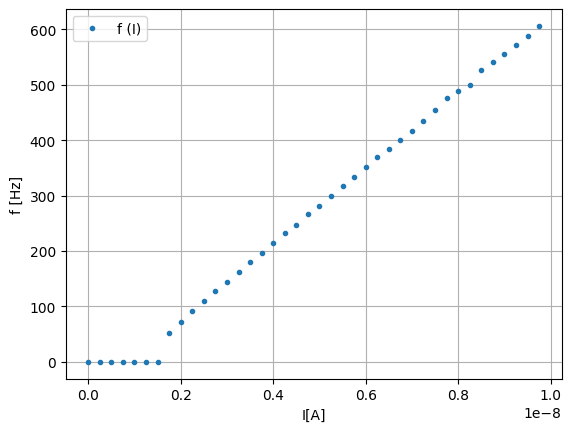

In [ ]:
#NUMERICAMENTE ESOS PICOS LOS OBTENGO DE LA FUNCOIN INTEGRATE AND FIRE
I=2e-9
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k=4000        # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005
V_u=-50e-3       #TENSION DE UMBRAL

def func(v,t):            #EQ DIFERENCIAL
    return (1/tau)*(E-v+R*I)

#INTEGRO USANDO LA FUNCION CON DISPARO
t,V_disp,picos=integrate_and_fire(rk4,v0, func, a,k, dt,V_u)
frec_num=1/(picos[0])     ### EN VEZ DE TOMAR DOS PUNTOS TOMO  DIRECTAMENTE EL PRIMERO, ES DECIR PICOS[0]
print(f' La frecuencia calculada numericamente da {frec_num} Hz')
arg=(-V_u+E+R*I)/(R*I)
frec_teo=1/(-tau*np.log(arg))
print(f' La frecuencia calculada teoricamente da {frec_teo} Hz')

## CALCULO LA FRECUENCIA PARA UN RANGO DE CORRIENTES
I_lista=np.arange(40)*0.25*1e-9

lista_frecuencias=[]

for i in range(len(I_lista)):
  I=I_lista[i]
  t,v,picos=integrate_and_fire(rk4,v0,func,a,k,dt,V_u)
  if len(picos)==0:
    lista_frecuencias.append(0)
  else:
    frecuencia=1/(picos[0])
    lista_frecuencias.append(frecuencia)

plt.title('Frequency vs current')

plt.plot(I_lista,lista_frecuencias,'.',label='f (I)')
plt.xlabel('I[A]')
plt.grid()
plt.ylabel('f [Hz]')
plt.legend()

### H) Now i studied an arbitrary current, time dependant , given by:

I(t)=2.5 Cos(t/30ms)

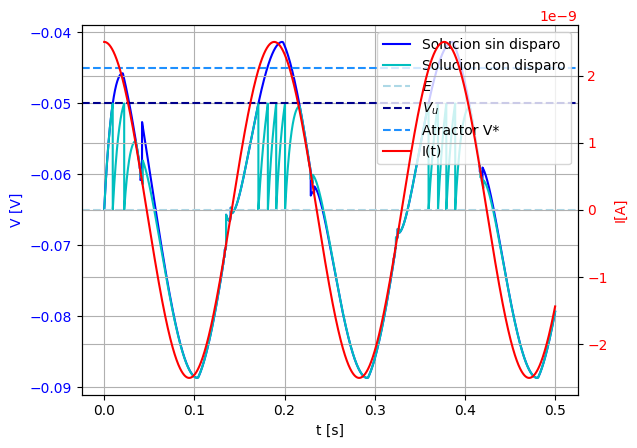

In [ ]:
#DEFINO LOS PARAMETROS
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k=10000        # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005
V_u=-50e-3       #TENSION DE UMBRAL

def func(v,t):            #EQ DIFERENCIAL
    I=2.5e-9*np.cos(t/0.03)
    return (1/tau)*(E-v+R*I)

#INTEGRO USANDO LA FUNCION CON DISPARO
t,V_disp,picos=integrate_and_fire(rk4,v0, func, a,k, dt,V_u)
#plt.plot(t,V_disp,color='b',label='Solución con disparo')

#INTEGRO USANDO LA FUNCION SIN DISPARO
t_num,V_num=integrador_ode(rk4,v0,func,a,k,dt)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t_num, V_num, 'b', label='Solucion sin disparo')
ax1.plot(t,V_disp,color='c',label='Solucion con disparo')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('V [V]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(E,linestyle='--',color='lightblue',label='$E$')
ax1.axhline(V_u,linestyle='--',color='darkblue',label='$V_u$')
ax1.axhline(atractor_B,linestyle='--',color='dodgerblue',label='Atractor V*')
ax1.grid()


ax2.plot(t_num, 2.5e-9*np.cos(t_num/0.03), 'r-', label='I(t)')
ax2.set_ylabel('I[A]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid()
# Agregar una leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="best")


plt.show()

###I) A diferent time dependant current (a Fourier family)

<ipython-input-35-6ebdf555b6ef>:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(t_num, 2.5e-9*np.cos(t_num/0.03), 'r-', label='I(t)',linestyle='--')


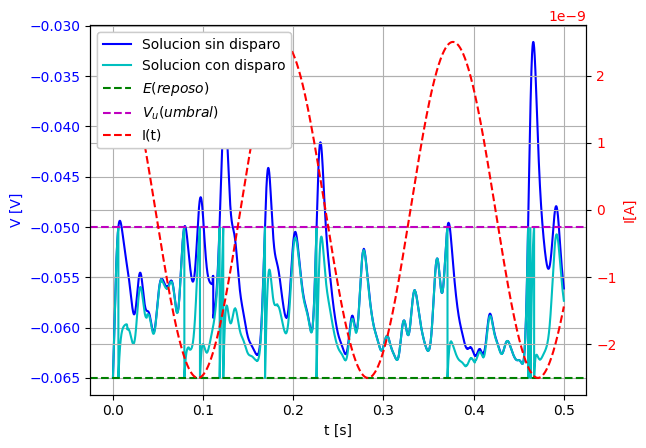

In [ ]:
#DEFINO LOS PARAMETROS
R=10e6
tau=10e-3
E=-65e-3
v0=np.array([E])
a=0         #TIEMPO INICIAL
k= 10000      # NUMERO DE PASOS DE INTEGRACION (quiero llegar a 200ms)
dt=0.00005
V_u=-50e-3       #TENSION DE UMBRAL


def func(v,t):
    I=0.35e-9*(np.cos(t/0.003)+np.sin(t/0.005)+np.cos(t/0.007)+np.sin(t/0.011)+np.cos(t/0.013))**2
    return (1/tau)*(E-v+R*I)

#INTEGRO USANDO LA FUNCION CON DISPARO
t,V_disp,picos=integrate_and_fire(rk4,v0, func, a,k, dt,V_u)

#INTEGRO USANDO LA FUNCION SIN DISPARO
t_num,V_num=integrador_ode(rk4,v0,func,a,k,dt)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t_num, V_num, 'b', label='Solucion sin disparo')
ax1.plot(t,V_disp,color='c',label='Solucion con disparo')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('V [V]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(E,linestyle='--',color='g',label='$E(reposo)$')
ax1.axhline(V_u,linestyle='--',color='m',label='$V_u(umbral)$')
#ax1.axhline(atractor_B,linestyle='--',color='dodgerblue',label='Atractor V*')
ax1.grid()


ax2.plot(t_num, 2.5e-9*np.cos(t_num/0.03), 'r-', label='I(t)',linestyle='--')
ax2.set_ylabel('I[A]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid()
# Agregar una leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left",framealpha=1)
ax2.legend(lines, labels, loc="upper left",framealpha=1)


plt.show()